# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('dataset/cancer_classification.csv')

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


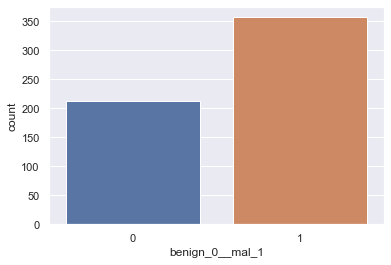

In [6]:
sns.countplot(x='benign_0__mal_1',data = df)

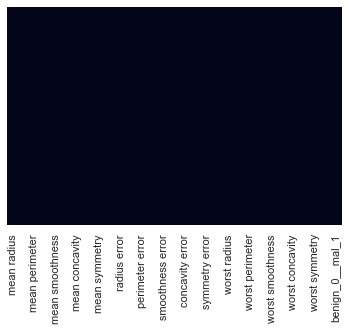

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

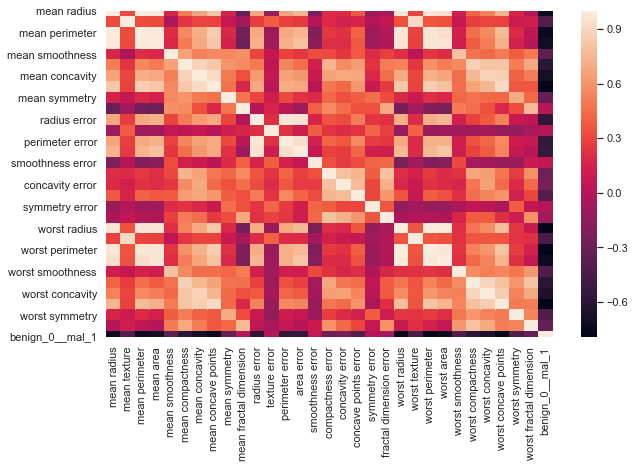

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

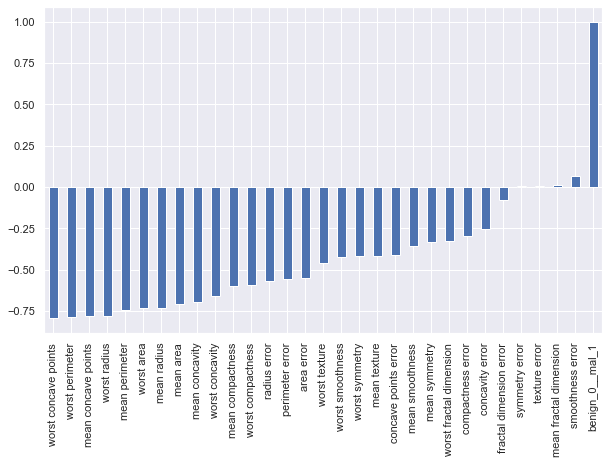

In [10]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

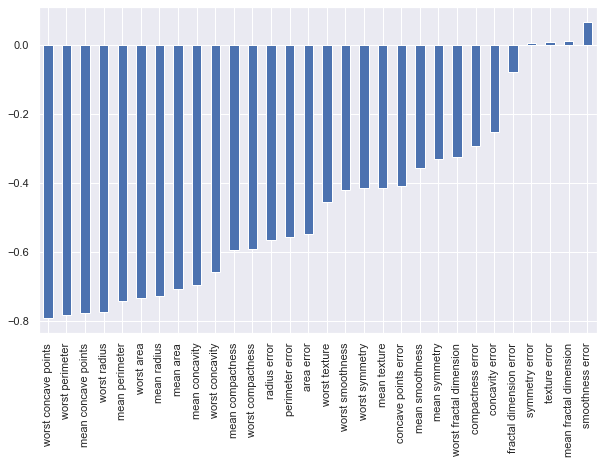

In [11]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# Train and Split data


In [12]:
x = df.drop('benign_0__mal_1',axis=1)
y = df['benign_0__mal_1'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=105)

# scaling data

In [14]:
scalar = MinMaxScaler()

In [15]:
scalar.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train = scalar.transform(X_train)
X_test  = scalar.transform(X_test)

# create Model

In [17]:
model =  Sequential()

model.add(Dense(units=30 , activation="relu"))
model.add(Dense(units=15 , activation='relu'))
model.add(Dense(units=1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting model 

In [18]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,verbose=1)

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 2s 5ms/sample - loss: 0.6844 - val_loss: 0.6734
Epoch 2/600
398/398 [==============================] - 0s 445us/sample - loss: 0.6598 - val_loss: 0.6491
Epoch 3/600
398/398 [==============================] - 0s 141us/sample - loss: 0.6361 - val_loss: 0.6246
Epoch 4/600
398/398 [==============================] - 0s 141us/sample - loss: 0.6089 - val_loss: 0.5904
Epoch 5/600
398/398 [==============================] - 0s 128us/sample - loss: 0.5764 - val_loss: 0.5559
Epoch 6/600
398/398 [==============================] - 0s 131us/sample - loss: 0.5422 - val_loss: 0.5200
Epoch 7/600
398/398 [==============================] - 0s 141us/sample - loss: 0.5035 - val_loss: 0.4774
Epoch 8/600
398/398 [==============================] - 0s 121us/sample - loss: 0.4621 - val_loss: 0.4308
Epoch 9/600
398/398 [==============================] - 0s 123us/sample - loss: 0.4182 - val_loss: 0.3868
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0611 - val_loss: 0.0419
Epoch 79/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0607 - val_loss: 0.0451
Epoch 80/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0611 - val_loss: 0.0431
Epoch 81/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0600 - val_loss: 0.0418
Epoch 82/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0599 - val_loss: 0.0411
Epoch 83/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0595 - val_loss: 0.0445
Epoch 84/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0578 - val_loss: 0.0409
Epoch 85/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0596 - val_loss: 0.0419
Epoch 86/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0601 - val_loss: 0.0411
Epoch 87/600
398/398 [========================

Epoch 155/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0417 - val_loss: 0.0366
Epoch 156/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0405 - val_loss: 0.0359
Epoch 157/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0413 - val_loss: 0.0364
Epoch 158/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0406 - val_loss: 0.0364
Epoch 159/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0408 - val_loss: 0.0369
Epoch 160/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0420 - val_loss: 0.0358
Epoch 161/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0410 - val_loss: 0.0363
Epoch 162/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0398 - val_loss: 0.0370
Epoch 163/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0405 - val_loss: 0.0392
Epoch 164/600
398/398 [==============

398/398 [==============================] - 0s 128us/sample - loss: 0.0294 - val_loss: 0.0376
Epoch 232/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0284 - val_loss: 0.0374
Epoch 233/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0289 - val_loss: 0.0382
Epoch 234/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0303 - val_loss: 0.0390
Epoch 235/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0285 - val_loss: 0.0379
Epoch 236/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0275 - val_loss: 0.0382
Epoch 237/600
398/398 [==============================] - 0s 138us/sample - loss: 0.0271 - val_loss: 0.0378
Epoch 238/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0275 - val_loss: 0.0380
Epoch 239/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0266 - val_loss: 0.0385
Epoch 240/600
398/398 [============================

398/398 [==============================] - 0s 141us/sample - loss: 0.0193 - val_loss: 0.0416
Epoch 308/600
398/398 [==============================] - 0s 163us/sample - loss: 0.0192 - val_loss: 0.0429
Epoch 309/600
398/398 [==============================] - 0s 143us/sample - loss: 0.0182 - val_loss: 0.0422
Epoch 310/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0191 - val_loss: 0.0423
Epoch 311/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0174 - val_loss: 0.0430
Epoch 312/600
398/398 [==============================] - 0s 146us/sample - loss: 0.0179 - val_loss: 0.0416
Epoch 313/600
398/398 [==============================] - 0s 141us/sample - loss: 0.0187 - val_loss: 0.0423
Epoch 314/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0185 - val_loss: 0.0421
Epoch 315/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0183 - val_loss: 0.0421
Epoch 316/600
398/398 [============================

398/398 [==============================] - 0s 123us/sample - loss: 0.0118 - val_loss: 0.0480
Epoch 384/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0119 - val_loss: 0.0497
Epoch 385/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0110 - val_loss: 0.0481
Epoch 386/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0108 - val_loss: 0.0495
Epoch 387/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0111 - val_loss: 0.0516
Epoch 388/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0125 - val_loss: 0.0486
Epoch 389/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0143 - val_loss: 0.0477
Epoch 390/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0114 - val_loss: 0.0507
Epoch 391/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0108 - val_loss: 0.0524
Epoch 392/600
398/398 [============================

398/398 [==============================] - 0s 138us/sample - loss: 0.0084 - val_loss: 0.0539
Epoch 460/600
398/398 [==============================] - 0s 171us/sample - loss: 0.0072 - val_loss: 0.0612
Epoch 461/600
398/398 [==============================] - 0s 151us/sample - loss: 0.0085 - val_loss: 0.0602
Epoch 462/600
398/398 [==============================] - 0s 141us/sample - loss: 0.0080 - val_loss: 0.0546
Epoch 463/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0061 - val_loss: 0.0635
Epoch 464/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0070 - val_loss: 0.0541
Epoch 465/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0094 - val_loss: 0.0599
Epoch 466/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0065 - val_loss: 0.0569
Epoch 467/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0066 - val_loss: 0.0583
Epoch 468/600
398/398 [============================

398/398 [==============================] - 0s 143us/sample - loss: 0.0040 - val_loss: 0.0636
Epoch 536/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0039 - val_loss: 0.0657
Epoch 537/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0040 - val_loss: 0.0642
Epoch 538/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0039 - val_loss: 0.0664
Epoch 539/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0039 - val_loss: 0.0690
Epoch 540/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0042 - val_loss: 0.0639
Epoch 541/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0037 - val_loss: 0.0690
Epoch 542/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0043 - val_loss: 0.0654
Epoch 543/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0037 - val_loss: 0.0702
Epoch 544/600
398/398 [============================

In [19]:
loss = pd.DataFrame(model.history.history)

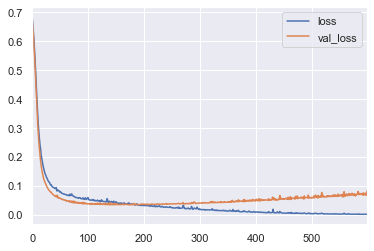

In [20]:
loss.plot()

In [29]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [31]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,verbose=1,callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 2ms/sample - loss: 0.6854 - val_loss: 0.6497
Epoch 2/600
398/398 [==============================] - 0s 123us/sample - loss: 0.6442 - val_loss: 0.6159
Epoch 3/600
398/398 [==============================] - 0s 126us/sample - loss: 0.6103 - val_loss: 0.5834
Epoch 4/600
398/398 [==============================] - 0s 136us/sample - loss: 0.5821 - val_loss: 0.5522
Epoch 5/600
398/398 [==============================] - 0s 143us/sample - loss: 0.5508 - val_loss: 0.5203
Epoch 6/600
398/398 [==============================] - 0s 141us/sample - loss: 0.5185 - val_loss: 0.4845
Epoch 7/600
398/398 [==============================] - 0s 141us/sample - loss: 0.4833 - val_loss: 0.4479
Epoch 8/600
398/398 [==============================] - 0s 118us/sample - loss: 0.4474 - val_loss: 0.4118
Epoch 9/600
398/398 [==============================] - 0s 116us/sample - loss: 0.4126 - val_loss: 0.3767
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0687 - val_loss: 0.0453
Epoch 79/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0736 - val_loss: 0.0428
Epoch 80/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0702 - val_loss: 0.0441
Epoch 81/600
398/398 [==============================] - 0s 115us/sample - loss: 0.0686 - val_loss: 0.0442
Epoch 82/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0672 - val_loss: 0.0422
Epoch 83/600
398/398 [==============================] - 0s 110us/sample - loss: 0.0691 - val_loss: 0.0439
Epoch 84/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0712 - val_loss: 0.0413
Epoch 85/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0750 - val_loss: 0.0422
Epoch 86/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0684 - val_loss: 0.0440
Epoch 87/600
398/398 [========================

Epoch 155/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0523 - val_loss: 0.0387
Epoch 156/600
398/398 [==============================] - 0s 105us/sample - loss: 0.0508 - val_loss: 0.0373
Epoch 157/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0518 - val_loss: 0.0412
Epoch 00157: early stopping


In [24]:
loss = pd.DataFrame(model.history.history)

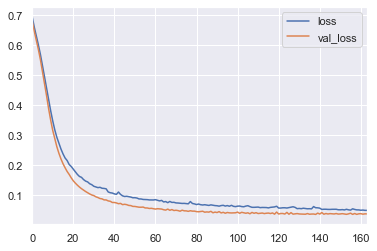

In [25]:
loss.plot()

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')



In [34]:

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])
          

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 3ms/sample - loss: 0.7060 - val_loss: 0.6796
Epoch 2/600
398/398 [==============================] - 0s 136us/sample - loss: 0.6784 - val_loss: 0.6616
Epoch 3/600
398/398 [==============================] - 0s 133us/sample - loss: 0.6690 - val_loss: 0.6451
Epoch 4/600
398/398 [==============================] - 0s 123us/sample - loss: 0.6391 - val_loss: 0.6171
Epoch 5/600
398/398 [==============================] - 0s 126us/sample - loss: 0.6250 - val_loss: 0.5849
Epoch 6/600
398/398 [==============================] - 0s 125us/sample - loss: 0.6001 - val_loss: 0.5586
Epoch 7/600
398/398 [==============================] - 0s 136us/sample - loss: 0.5966 - val_loss: 0.5370
Epoch 8/600
398/398 [==============================] - 0s 128us/sample - loss: 0.5697 - val_loss: 0.5096
Epoch 9/600
398/398 [==============================] - 0s 128us/sample - loss: 0.5455 - val_loss: 0.4748
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 123us/sample - loss: 0.1643 - val_loss: 0.0630
Epoch 79/600
398/398 [==============================] - 0s 120us/sample - loss: 0.1494 - val_loss: 0.0637
Epoch 80/600
398/398 [==============================] - 0s 113us/sample - loss: 0.1498 - val_loss: 0.0626
Epoch 81/600
398/398 [==============================] - 0s 131us/sample - loss: 0.1312 - val_loss: 0.0607
Epoch 82/600
398/398 [==============================] - 0s 128us/sample - loss: 0.1283 - val_loss: 0.0616
Epoch 83/600
398/398 [==============================] - 0s 118us/sample - loss: 0.1643 - val_loss: 0.0625
Epoch 84/600
398/398 [==============================] - 0s 131us/sample - loss: 0.1484 - val_loss: 0.0651
Epoch 85/600
398/398 [==============================] - 0s 121us/sample - loss: 0.1423 - val_loss: 0.0618
Epoch 86/600
398/398 [==============================] - 0s 116us/sample - loss: 0.1281 - val_loss: 0.0603
Epoch 87/600
398/398 [========================

Epoch 155/600
398/398 [==============================] - 0s 113us/sample - loss: 0.1078 - val_loss: 0.0363
Epoch 156/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0934 - val_loss: 0.0374
Epoch 157/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0937 - val_loss: 0.0374
Epoch 158/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0962 - val_loss: 0.0382
Epoch 159/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0776 - val_loss: 0.0361
Epoch 160/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0969 - val_loss: 0.0350
Epoch 161/600
398/398 [==============================] - 0s 125us/sample - loss: 0.0861 - val_loss: 0.0350
Epoch 162/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0793 - val_loss: 0.0346
Epoch 163/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0911 - val_loss: 0.0344
Epoch 164/600
398/398 [==============

In [35]:
loss = pd.DataFrame(model.history.history)

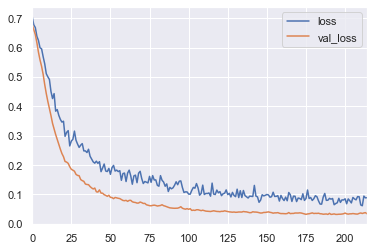

In [36]:
loss.plot()

# Model Evaluation

In [37]:
predictions = model.predict_classes(X_test)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.99      0.99      0.99       112

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [39]:
print(confusion_matrix(y_test,predictions))

[[ 58   1]
 [  1 111]]
